In [148]:
import pandas as pd
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 2000)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(style="whitegrid")


In [149]:
df = pd.read_csv('/Users/jmirabito/Desktop/Learn.co/mod_2_final_project/citibike_modeling_dataset.csv')

In [150]:
df.set_index(['date','station_id'], inplace=True)

In [151]:
df.head()

rider_count  TAVG  PRCP  dist_PATH  dist_landmark  \
date       station_id                                                      
2019-08-01 3184                 86  79.0   0.0   0.010906       0.043861   
           3185                 91  79.0   0.0   0.010270       0.040780   
           3186                501  79.0   0.0   0.008522       0.038837   
           3187                121  79.0   0.0   0.003982       0.036882   
           3191                 22  79.0   0.0   0.025381       0.061002   

                       median_inc    mean_inc  population_zip  station_zip  \
date       station_id                                                        
2019-08-01 3184        76967.0500  98752.3753         31104.0         7302   
           3185        76967.0500  98752.3753         31104.0         7302   
           3186        76967.0500  98752.3753         31104.0         7302   
           3187        76967.0500  98752.3753         31104.0         7302   
           3191        40861.4099  56704.7387         41745.0         7304   

                       weekend  Monday  Tuesday  Wednesday  Thursday  Friday  \
date       station_id                                                          
2019-08-01 3184              0       0        0          0         1       0   
           3185              0       0        0          0         1       0   
           3186              0       0        0          0         1       0   
           3187              0       0        0          0         1       0   
           3191              0       0        0          0         1       0   

                       Saturday  Sunday  
date       station_id                    
2019-08-01 3184               0       0  
           3185               0       0  
           3186               0       0  
           3187               0       0  
           3191               0       0

In [152]:
# Convert zipcode to string
df.station_zip = df.station_zip.astype(str)
df.station_zip = df.station_zip.apply(lambda x: x[0:5])
df.station_zip = df.station_zip.apply(lambda x: x.strip('.'))
df.station_zip = df.station_zip.apply(lambda x: '0'+ x if x.startswith('7') else x)

In [153]:
df = pd.concat([df, pd.get_dummies(df['station_zip'])], 1)

In [154]:
df.head()

rider_count  TAVG  PRCP  dist_PATH  dist_landmark  \
date       station_id                                                      
2019-08-01 3184                 86  79.0   0.0   0.010906       0.043861   
           3185                 91  79.0   0.0   0.010270       0.040780   
           3186                501  79.0   0.0   0.008522       0.038837   
           3187                121  79.0   0.0   0.003982       0.036882   
           3191                 22  79.0   0.0   0.025381       0.061002   

                       median_inc    mean_inc  population_zip station_zip  \
date       station_id                                                       
2019-08-01 3184        76967.0500  98752.3753         31104.0       07302   
           3185        76967.0500  98752.3753         31104.0       07302   
           3186        76967.0500  98752.3753         31104.0       07302   
           3187        76967.0500  98752.3753         31104.0       07302   
           3191        40861.4099  56704.7387         41745.0       07304   

                       weekend  Monday  Tuesday  Wednesday  Thursday  Friday  \
date       station_id                                                          
2019-08-01 3184              0       0        0          0         1       0   
           3185              0       0        0          0         1       0   
           3186              0       0        0          0         1       0   
           3187              0       0        0          0         1       0   
           3191              0       0        0          0         1       0   

                       Saturday  Sunday  07087  07302  07304  07305  07306  \
date       station_id                                                        
2019-08-01 3184               0       0      0      1      0      0      0   
           3185               0       0      0      1      0      0      0   
           3186               0       0      0      1      0      0      0   
           3187               0       0      0      1      0      0      0   
           3191               0       0      0      0      1      0      0   

                       07307  07310  07311  
date       station_id                       
2019-08-01 3184            0      0      0  
           3185            0      0      0  
           3186            0      0      0  
           3187            0      0      0  
           3191            0      0      0

In [155]:
df.drop(['station_zip'], axis=1, inplace=True)

In [156]:
print(df.shape)
df.head()

(20064, 24)


rider_count  TAVG  PRCP  dist_PATH  dist_landmark  \
date       station_id                                                      
2019-08-01 3184                 86  79.0   0.0   0.010906       0.043861   
           3185                 91  79.0   0.0   0.010270       0.040780   
           3186                501  79.0   0.0   0.008522       0.038837   
           3187                121  79.0   0.0   0.003982       0.036882   
           3191                 22  79.0   0.0   0.025381       0.061002   

                       median_inc    mean_inc  population_zip  weekend  \
date       station_id                                                    
2019-08-01 3184        76967.0500  98752.3753         31104.0        0   
           3185        76967.0500  98752.3753         31104.0        0   
           3186        76967.0500  98752.3753         31104.0        0   
           3187        76967.0500  98752.3753         31104.0        0   
           3191        40861.4099  56704.7387         41745.0        0   

                       Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  \
date       station_id                                                           
2019-08-01 3184             0        0          0         1       0         0   
           3185             0        0          0         1       0         0   
           3186             0        0          0         1       0         0   
           3187             0        0          0         1       0         0   
           3191             0        0          0         1       0         0   

                       Sunday  07087  07302  07304  07305  07306  07307  \
date       station_id                                                     
2019-08-01 3184             0      0      1      0      0      0      0   
           3185             0      0      1      0      0      0      0   
           3186             0      0      1      0      0      0      0   
           3187             0      0      1      0      0      0      0   
           3191             0      0      0      1      0      0      0   

                       07310  07311  
date       station_id                
2019-08-01 3184            0      0  
           3185            0      0  
           3186            0      0  
           3187            0      0  
           3191            0      0

In [157]:
# Removing features that are highly correlated
corr_matrix = df.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.shape

# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

df.drop(columns=to_drop, inplace=True)

## Creating and training a linear model

In [158]:
from sklearn.model_selection import train_test_split

target = df.rider_count
df_features = df.drop(['rider_count'], axis=1)

#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=20200912,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (16051, 21) Target:  (16051,)
Test set - Features:  (4013, 21) Target:  (4013,)


In [159]:
# Fitting the scaler to the training data only

scaler = StandardScaler()

scaler.fit(X_train)

StandardScaler()

In [160]:
# Transforming the training data
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=df_features.columns)

# Transforming the testing data
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df_features.columns)

In [161]:
# Fitting the model to the training data

from sklearn.linear_model import LinearRegression

# instantiate a linear regression object
lm = LinearRegression()

# fit the linear regression to the data
lm = lm.fit(X_train, y_train)

In [162]:
# Using the model to predict on the training set

from sklearn import metrics

y_train_pred = lm.predict(X_train)

# Evaluate model performance on training set
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

In [163]:
# Using the model to predict on the test set

y_test_pred = lm.predict(X_test)

# Evaluating the predictions on the test set
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

In [164]:
# Compare MRSE values for both models
ridership_std = target.std()

print('Training Root Mean Squared Error:' , train_rmse/ridership_std)
print('Test Root Mean Squared Error:' , test_rmse/ridership_std)

Training Root Mean Squared Error: 0.8683879536000064
Test Root Mean Squared Error: 0.8257330682672517


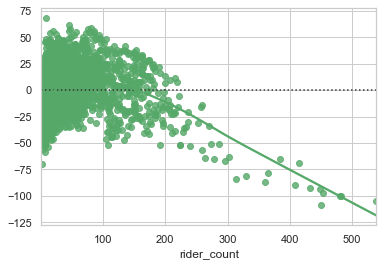

In [165]:
import seaborn as sns
sns.residplot( y_test, y_test_pred,lowess=True, color="g")

## Feature Selection Methods

In [166]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression


# Running a for loop to determine which number of features in a polynomial model will minimize the difference 
# between the training and testing RMSE values.

difference_features = []

for i in range(1,len(df.columns)):
    selector = SelectKBest(f_regression, k=i)
    selector.fit(X_train, y_train)

    selected_columns = X_train.columns[selector.get_support()]
    removed_columns = X_train.columns[~selector.get_support()]

    # Instantiate a linear regression object
    lm_kbest = LinearRegression()

    # Fit the linear regression to the training data set
    lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)

    y_train_kbest = lm_kbest.predict(X_train[selected_columns])

    trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))

    # Fit the linear regression to the testing data set and make predictions
    y_kbest = lm_kbest.predict(X_test[selected_columns])

    testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

    
    difference_features.append((i, abs(trainK_rmse/ridership_std - testK_rmse/ridership_std)))

In [167]:
# Create a df that displays the abs difference between training and test sets for a given numer of features, k.
opt_num_feat = pd.DataFrame(difference_features, columns=["k", "abs_difference"])

opt_num_feat.sort_values(by='abs_difference')

,k,abs_difference
13,14,0.040978
10,11,0.041104
9,10,0.041104
11,12,0.041104
12,13,0.041193
7,8,0.041855
8,9,0.041866
6,7,0.042018
14,15,0.042551
15,16,0.042592


In [168]:
# Re-run the filter method by replacing k with the best performing number of features
selector = SelectKBest(f_regression, k=10)
selector.fit(X_train, y_train)

selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse/ridership_std)

print('Testing Root Mean Squared Error:' , testK_rmse/ridership_std)


Training Root Mean Squared Error: 0.8709928231595041
Testing Root Mean Squared Error: 0.8298889672896589


## Adding additional features to evaluate performance

In [169]:
df.head()

rider_count  TAVG  PRCP  dist_PATH  dist_landmark  \
date       station_id                                                      
2019-08-01 3184                 86  79.0   0.0   0.010906       0.043861   
           3185                 91  79.0   0.0   0.010270       0.040780   
           3186                501  79.0   0.0   0.008522       0.038837   
           3187                121  79.0   0.0   0.003982       0.036882   
           3191                 22  79.0   0.0   0.025381       0.061002   

                       median_inc  weekend  Monday  Tuesday  Wednesday  \
date       station_id                                                    
2019-08-01 3184        76967.0500        0       0        0          0   
           3185        76967.0500        0       0        0          0   
           3186        76967.0500        0       0        0          0   
           3187        76967.0500        0       0        0          0   
           3191        40861.4099        0       0        0          0   

                       Thursday  Friday  Saturday  Sunday  07087  07302  \
date       station_id                                                     
2019-08-01 3184               1       0         0       0      0      1   
           3185               1       0         0       0      0      1   
           3186               1       0         0       0      0      1   
           3187               1       0         0       0      0      1   
           3191               1       0         0       0      0      0   

                       07304  07305  07306  07307  07310  07311  
date       station_id                                            
2019-08-01 3184            0      0      0      0      0      0  
           3185            0      0      0      0      0      0  
           3186            0      0      0      0      0      0  
           3187            0      0      0      0      0      0  
           3191            1      0      0      0      0      0

In [170]:
df.reset_index(inplace=True)

In [171]:
print(df.shape)
df.head()

(20064, 24)


,date,station_id,rider_count,TAVG,PRCP,dist_PATH,dist_landmark,median_inc,weekend,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,07087,07302,07304,07305,07306,07307,07310,07311
0,2019-08-01,3184,86,79.0,0.0,0.010906,0.043861,76967.0500,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,2019-08-01,3185,91,79.0,0.0,0.010270,0.040780,76967.0500,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,2019-08-01,3186,501,79.0,0.0,0.008522,0.038837,76967.0500,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,2019-08-01,3187,121,79.0,0.0,0.003982,0.036882,76967.0500,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,2019-08-01,3191,22,79.0,0.0,0.025381,0.061002,40861.4099,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [172]:
df['month'] = df.date.apply(lambda x: x[5:7])


In [173]:
df.head()

,date,station_id,rider_count,TAVG,PRCP,dist_PATH,dist_landmark,median_inc,weekend,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,07087,07302,07304,07305,07306,07307,07310,07311,month
0,2019-08-01,3184,86,79.0,0.0,0.010906,0.043861,76967.0500,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,08
1,2019-08-01,3185,91,79.0,0.0,0.010270,0.040780,76967.0500,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,08
2,2019-08-01,3186,501,79.0,0.0,0.008522,0.038837,76967.0500,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,08
3,2019-08-01,3187,121,79.0,0.0,0.003982,0.036882,76967.0500,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,08
4,2019-08-01,3191,22,79.0,0.0,0.025381,0.061002,40861.4099,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,08


In [174]:
# Creating a column for season
conditions = [
    df['month'].isin(['12', '01', '02']),
    df['month'].isin(['03', '04', '05']),
    df['month'].isin(['06', '07', '08']),
    df['month'].isin(['09', '10', '11'])
]

choices = [
    'winter',
    'spring',
    'summer',
    'fall'
]

df['season'] = np.select(conditions, choices, default=np.nan)

In [175]:
df.head()

,date,station_id,rider_count,TAVG,PRCP,dist_PATH,dist_landmark,median_inc,weekend,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,07087,07302,07304,07305,07306,07307,07310,07311,month,season
0,2019-08-01,3184,86,79.0,0.0,0.010906,0.043861,76967.0500,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,08,summer
1,2019-08-01,3185,91,79.0,0.0,0.010270,0.040780,76967.0500,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,08,summer
2,2019-08-01,3186,501,79.0,0.0,0.008522,0.038837,76967.0500,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,08,summer
3,2019-08-01,3187,121,79.0,0.0,0.003982,0.036882,76967.0500,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,08,summer
4,2019-08-01,3191,22,79.0,0.0,0.025381,0.061002,40861.4099,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,08,summer


In [176]:
df = pd.concat([df, pd.get_dummies(df['season'])], 1)

In [177]:
df.drop(['season', 'month'], axis=1, inplace=True)

In [178]:
df.head()

,date,station_id,rider_count,TAVG,PRCP,dist_PATH,dist_landmark,median_inc,weekend,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,07087,07302,07304,07305,07306,07307,07310,07311,fall,spring,summer,winter
0,2019-08-01,3184,86,79.0,0.0,0.010906,0.043861,76967.0500,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,2019-08-01,3185,91,79.0,0.0,0.010270,0.040780,76967.0500,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,2019-08-01,3186,501,79.0,0.0,0.008522,0.038837,76967.0500,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,2019-08-01,3187,121,79.0,0.0,0.003982,0.036882,76967.0500,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,2019-08-01,3191,22,79.0,0.0,0.025381,0.061002,40861.4099,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [179]:
df.set_index(['date', 'station_id'], inplace=True)

In [180]:
print(df.shape)
df.head()

(20064, 26)


rider_count  TAVG  PRCP  dist_PATH  dist_landmark  \
date       station_id                                                      
2019-08-01 3184                 86  79.0   0.0   0.010906       0.043861   
           3185                 91  79.0   0.0   0.010270       0.040780   
           3186                501  79.0   0.0   0.008522       0.038837   
           3187                121  79.0   0.0   0.003982       0.036882   
           3191                 22  79.0   0.0   0.025381       0.061002   

                       median_inc  weekend  Monday  Tuesday  Wednesday  \
date       station_id                                                    
2019-08-01 3184        76967.0500        0       0        0          0   
           3185        76967.0500        0       0        0          0   
           3186        76967.0500        0       0        0          0   
           3187        76967.0500        0       0        0          0   
           3191        40861.4099        0       0        0          0   

                       Thursday  Friday  Saturday  Sunday  07087  07302  \
date       station_id                                                     
2019-08-01 3184               1       0         0       0      0      1   
           3185               1       0         0       0      0      1   
           3186               1       0         0       0      0      1   
           3187               1       0         0       0      0      1   
           3191               1       0         0       0      0      0   

                       07304  07305  07306  07307  07310  07311  fall  spring  \
date       station_id                                                           
2019-08-01 3184            0      0      0      0      0      0     0       0   
           3185            0      0      0      0      0      0     0       0   
           3186            0      0      0      0      0      0     0       0   
           3187            0      0      0      0      0      0     0       0   
           3191            1      0      0      0      0      0     0       0   

                       summer  winter  
date       station_id                  
2019-08-01 3184             1       0  
           3185             1       0  
           3186             1       0  
           3187             1       0  
           3191             1       0

## Re-create a linear model including the season dummies

In [181]:
from sklearn.model_selection import train_test_split

target = df.rider_count
df_features = df.drop(['rider_count'], axis=1)

#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=20200912,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (16051, 25) Target:  (16051,)
Test set - Features:  (4013, 25) Target:  (4013,)


In [182]:
# Fitting the scaler to the training data only

scaler = StandardScaler()

scaler.fit(X_train)

StandardScaler()

In [183]:
# Transforming the training data
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=df_features.columns)

# Transforming the testing data
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df_features.columns)

In [184]:
# Fitting the model to the training data

from sklearn.linear_model import LinearRegression

# instantiate a linear regression object
lm = LinearRegression()

# fit the linear regression to the data
lm = lm.fit(X_train, y_train)

In [185]:
# Using the model to predict on the training set

from sklearn import metrics

y_train_pred = lm.predict(X_train)

# Evaluate model performance on training set
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

In [186]:
# Using the model to predict on the test set

y_test_pred = lm.predict(X_test)

# Evaluating the predictions on the test set
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

In [187]:
# Compare MRSE values for both models
ridership_std = target.std()

print('Training Root Mean Squared Error:' , train_rmse/ridership_std)
print('Test Root Mean Squared Error:' , test_rmse/ridership_std)

Training Root Mean Squared Error: 0.8498622624185603
Test Root Mean Squared Error: 0.803810893963816


Our training models seems to be slightly underfit, but within an acceptable range. We'll conduct some feature selection methods to see if we can improve model performance.

## F-Test feature selection

In [188]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression


# Running a for loop to determine which number of features in a polynomial model will minimize the difference 
# between the training and testing RMSE values.

difference_features = []

for i in range(1,len(df.columns)):
    selector = SelectKBest(f_regression, k=i)
    selector.fit(X_train, y_train)

    selected_columns = X_train.columns[selector.get_support()]
    removed_columns = X_train.columns[~selector.get_support()]

    # Instantiate a linear regression object
    lm_kbest = LinearRegression()

    # Fit the linear regression to the training data set
    lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)

    y_train_kbest = lm_kbest.predict(X_train[selected_columns])

    trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))

    # Fit the linear regression to the testing data set and make predictions
    y_kbest = lm_kbest.predict(X_test[selected_columns])

    testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

    
    difference_features.append((i, abs(trainK_rmse/ridership_std - testK_rmse/ridership_std)))

In [189]:
# Create a df that displays the abs difference between training and test sets for a given numer of features, k.
opt_num_feat = pd.DataFrame(difference_features, columns=["k", "abs_difference"])

opt_num_feat.sort_values(by='abs_difference')

,k,abs_difference
3,4,0.043317
2,3,0.043750
8,9,0.044175
14,15,0.044276
15,16,0.044290
13,14,0.044290
17,18,0.044300
16,17,0.044437
1,2,0.044782
10,11,0.045094


In [200]:
# Re-run the filter method by replacing k with the best performing number of features
selector = SelectKBest(f_regression, k=3)
selector.fit(X_train, y_train)

selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse/ridership_std)

print('Testing Root Mean Squared Error:' , testK_rmse/ridership_std)


Training Root Mean Squared Error: 0.8845740929709021
Testing Root Mean Squared Error: 0.840823702683119


Variance seemed to increase in decreasing the number of features in the model, but the model seems to fit both the sets better. The next step will be to see how a larger, second-degree polynomial model performs compared to the linear regression model.